In [1]:
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [2]:
def load_dataset(filename):
    data = pd.read_json(filename)
    return data


df = load_dataset('drive/MyDrive/Colab Notebooks/movies_data/movies5.json')

In [3]:
#there was to much data for free use of google colab
#also these rows of data I'm using at the end of this file, to show how model predicts film genres
my_test_data = df[len(df)-2000:]

df = df[:len(df)-2000]
data = df['plot']
labels = df['genres']

In [4]:
def genresSet(labels):
  uniqueGenres = []
  for label in labels:
    for genre in label:
      if genre not in uniqueGenres:
        uniqueGenres.append(genre)
  return uniqueGenres

def myLabelEncoder(labels, genres):
  encoded = []
  for label in labels:
    encodedLabel = []
    for genre in genres:
      if genre in label:
        encodedLabel.append(1)
      else:
        encodedLabel.append(0)
    encoded.append(encodedLabel)
  return encoded

{'Animation': 611, 'Adventure': 996, 'Drama': 1631, 'Romance': 498, 'Action': 1041, 'Sci-Fi': 324, 'Mystery': 491, 'Crime': 666, 'Comedy': 1125, 'Fantasy': 364, 'Thriller': 508, 'Horror': 533}


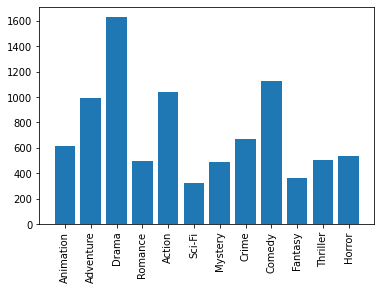

In [5]:
#data overview
genresList = genresSet(labels)

count_dic = {}

for genre in genresList:
  count_dic[genre] = 0

for label in labels:
  for genre in label:
    count_dic[genre]+=1
  
print(count_dic)

names = list(count_dic.keys())
values = list(count_dic.values())

plt.bar(range(len(count_dic)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()


In [6]:
#Encoding and vectorization
genresList = genresSet(labels)
Y = myLabelEncoder(labels, genresList)
Y = np.array(Y)

vectorizer = CountVectorizer(ngram_range = (1,3))
X = vectorizer.fit_transform(data)

X = X.toarray()

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [8]:

model = Sequential()
model.add(Dense(50, input_dim=X.shape[1], activation='relu'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(Y.shape[1], activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

mymodel = model.fit(X_train, Y_train, epochs=10, verbose=1, validation_split=0.2)


Epoch 1/10
70/70 [==============================] - 13s 165ms/step - loss: 0.6000 - accuracy: 0.0135 - val_loss: 0.5228 - val_accuracy: 0.0144
Epoch 2/10
70/70 [==============================] - 9s 127ms/step - loss: 0.4784 - accuracy: 0.3423 - val_loss: 0.4855 - val_accuracy: 0.3759
Epoch 3/10
70/70 [==============================] - 6s 80ms/step - loss: 0.4132 - accuracy: 0.4121 - val_loss: 0.4644 - val_accuracy: 0.3723
Epoch 4/10
70/70 [==============================] - 6s 80ms/step - loss: 0.3499 - accuracy: 0.4309 - val_loss: 0.4471 - val_accuracy: 0.3669
Epoch 5/10
70/70 [==============================] - 6s 79ms/step - loss: 0.3027 - accuracy: 0.4777 - val_loss: 0.4345 - val_accuracy: 0.3633
Epoch 6/10
70/70 [==============================] - 6s 79ms/step - loss: 0.2672 - accuracy: 0.4953 - val_loss: 0.4250 - val_accuracy: 0.3633
Epoch 7/10
70/70 [==============================] - 6s 80ms/step - loss: 0.2387 - accuracy: 0.5304 - val_loss: 0.4184 - val_accuracy: 0.3705
Epoch 8/10

Test loss: 0.4171464443206787
Test accuracy: 0.3525179922580719


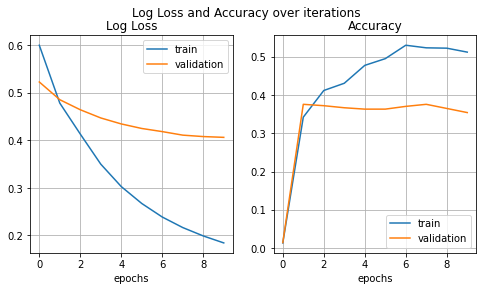

In [9]:

def plot_loss_accuracy(loss, val_loss, acc, val_acc):
    fig = plt.figure(figsize=(8, 4))
    fig.suptitle('Log Loss and Accuracy over iterations')

    # add_subplot(rows, columns, index)
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(loss)
    ax.plot(val_loss)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Log Loss')
    ax.legend(['train', 'validation'], loc='upper right')

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(acc)
    ax.plot(val_acc)
    ax.grid(True)
    ax.set(xlabel='epochs', title='Accuracy')
    ax.legend(['train', 'validation'], loc='lower right')


plot_loss_accuracy(mymodel.history['loss'],
                   mymodel.history['val_loss'],
                   mymodel.history['accuracy'],
                   mymodel.history['val_accuracy'])

# TEST THE MODEL
loss, accuracy = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

In [10]:
def my_prediction_test_function(X, Y):
  predictions = model.predict(X[:1])
  for prediction in predictions:
    for index, genre in enumerate(genresList):
      print("genre:  prediction   |  correct_answer")
      print(f'{genre}: {prediction[index]}  |   {Y[0][index]}')
      


In [11]:
#input: movie plot
#output: genres predicted by model that have more than 40% probability
def print_genre_prediciton(plot):
  data = [plot]
  Z = vectorizer.transform(data)
  Z = Z.toarray()
  prediction = model.predict(Z[:1])

  for index, genre in enumerate(genresList):
    if prediction[0][index]>0.4:
      print(f'{genre}: {prediction[0][index]}')

In [12]:
#input: raw data from json
#output: for every movie in data, shows probability for each genre
def my_prediction_test_function_detailed(data):
  labels = data['genres']
  titles = data['title']
  plots = data['plot']

  Y = myLabelEncoder(labels, genresList)
  Y = np.array(Y)

  X = vectorizer.transform(plots)
  X = X.toarray()
  print(X)
  
  predictions = model.predict(X)
  print("predictions: ", predictions)
  print("genre:  prediction   |  correct_answer")
  for i, prediction in enumerate(predictions):
    print(i)
    print(f'title: {titles[i]}')
    for j, genre in enumerate(genresList):
      print(f'{genre}: {prediction[j]}  |   {Y[i][j]}')

In [13]:

my_test_data.reset_index(drop=True, inplace=True)
my_prediction_test_function_detailed(my_test_data)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Thriller: 0.02224266529083252  |   0
Horror: 0.03141742944717407  |   0
1643
title: Mr. Pickles
Animation: 0.14677655696868896  |   1
Adventure: 0.1545427441596985  |   0
Drama: 0.4600032866001129  |   0
Romance: 0.11429327726364136  |   0
Action: 0.10052984952926636  |   0
Sci-Fi: 0.07889735698699951  |   0
Mystery: 0.054092735052108765  |   0
Crime: 0.0869709849357605  |   0
Comedy: 0.5961474180221558  |   1
Fantasy: 0.06739646196365356  |   0
Thriller: 0.04478400945663452  |   0
Horror: 0.05965399742126465  |   1
1644
title: Liga Sprawiedliwości: Mrok
Animation: 0.30944687128067017  |   1
Adventure: 0.7798263430595398  |   1
Drama: 0.11237266659736633  |   0
Romance: 0.016431570053100586  |   0
Action: 0.8830679059028625  |   1
Sci-Fi: 0.09902030229568481  |   0
Mystery: 0.05616796016693115  |   0
Crime: 0.10944470763206482  |   0
Comedy: 0.08152791857719421  |   0
Fantasy: 0.16259020566940308  |   0
Thriller: 0.115115